<a href="https://colab.research.google.com/github/JulianMejia6/IA_2025/blob/main/Regresion_logistica_cancer_cervical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tamaño original: (858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Tamaño después de limpieza: (858, 36)
Accuracy: 0.9341085271317829

Matriz de confusión:
 [[241   0]
 [ 17   0]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       241
         1.0       0.00      0.00      0.00        17

    accuracy                           0.93       258
   macro avg       0.47      0.50      0.48       258
weighted avg       0.87      0.93      0.90       258



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


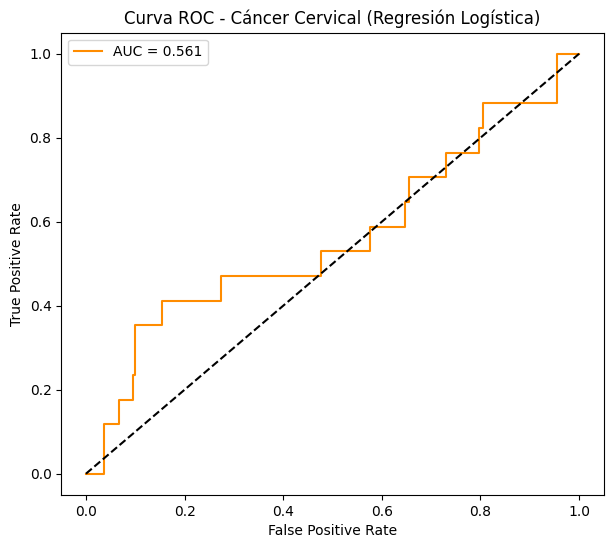


Coeficientes del modelo (importancia):


,Variable,Coeficiente
6,STDs,0.307012
0,Age,0.210678
3,Num of pregnancies,0.047819
2,First sexual intercourse,0.000218
1,Number of sexual partners,-0.089598
4,Smokes,-0.096441
5,Hormonal Contraceptives,-0.107246
7,STDs:HPV,-0.192338


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Cargar dataset
# ----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
df = pd.read_csv(url)

print("Tamaño original:", df.shape)
display(df.head())

# ----------------------------
# 2. Limpieza de datos
# ----------------------------
# Reemplazar "?" por NaN y convertir a numérico
df = df.replace("?", np.nan)
df = df.astype(float)

# Eliminar filas con demasiados valores nulos
df = df.dropna(thresh=10)   # al menos 10 valores no nulos
df = df.fillna(df.median()) # llenar faltantes con mediana

print("Tamaño después de limpieza:", df.shape)

# ----------------------------
# 3. Selección de variables
# ----------------------------
# Tomamos solo algunas relevantes (para simplificar)
features = [
    "Age", "Number of sexual partners", "First sexual intercourse",
    "Num of pregnancies", "Smokes", "Hormonal Contraceptives",
    "STDs", "STDs:HPV"
]

target = "Biopsy"

X = df[features]
y = df[target]

# ----------------------------
# 4. Separar entrenamiento y prueba
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------
# 5. Escalado y modelo
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_scaled, y_train)

# ----------------------------
# 6. Evaluación
# ----------------------------
y_pred = modelo.predict(X_test_scaled)
y_prob = modelo.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# ----------------------------
# 7. Curva ROC
# ----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color="darkorange")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Cáncer Cervical (Regresión Logística)")
plt.legend()
plt.show()

# ----------------------------
# 8. Interpretación de coeficientes
# ----------------------------
coef = pd.DataFrame({
    "Variable": features,
    "Coeficiente": modelo.coef_[0]
}).sort_values("Coeficiente", ascending=False)

print("\nCoeficientes del modelo (importancia):")
display(coef)